In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('DSA_features.csv')

In [3]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [4]:
df.shape

(9120, 272)

In [37]:
# 결측치 확인

df.isnull().values.any()

False

In [8]:
normal_data = df[df['activity'].isin(['lyingRight', 'lyingBack'])]
anomalous_data = df[df['activity'] == 'jumping']

In [9]:
test_data = pd.concat([normal_data, anomalous_data])

In [17]:
input_dim = normal_data.shape[1] - 2 

In [11]:
scaler = StandardScaler()
X_normal_scaled = scaler.fit_transform(X_normal)
X_test_scaled = scaler.transform(X_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)
encoder = Dense(16, activation='relu')(encoder)

In [19]:
decoder = Dense(32, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='linear')(decoder)

In [20]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [21]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
X_train = normal_data.drop(['activity', 'people'], axis=1).values
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - loss: 5.2764
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 3.1655
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 1.4183
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 1.1563
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.9233
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.8492
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.7867
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.5561
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.4725
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3996
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.4902
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 0.4410
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 0.4819
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.3725
Epoch 15/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss

In [23]:
X_test = test_data.drop(['activity', 'people'], axis=1).values

In [24]:
X_test_reconstructed = autoencoder.predict(X_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step


In [25]:
reconstruction_error = np.mean(np.abs(X_test - X_test_reconstructed), axis=1)

In [26]:
threshold = np.percentile(reconstruction_error, 95)

In [27]:
predicted_labels = ['abnormal' if err > threshold else 'normal' for err in reconstruction_error]

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
actual_labels = ['normal' if act in ['lyingRight', 'lyingBack'] else 'abnormal' for act in test_data['activity']]

In [30]:
accuracy = accuracy_score(actual_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.55


In [38]:
df['activity'] = df['activity'].replace({'lyingRight': 'normal', 'lyingBack': 'normal', 'jumping': 'abnormal'})


In [39]:
train_data = df[df['activity'] == 'normal'].drop(['activity', 'people'], axis=1)
test_data = df[df['activity'].isin(['normal', 'abnormal'])].drop(['activity', 'people'], axis=1)


In [40]:
from keras.models import Model
from keras.layers import Input, Dense

input_dim = train_data.shape[1]
encoding_dim = 32  # Bottleneck

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)

decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(train_data, train_data, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7547 - val_loss: 5.1568
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.3932 - val_loss: 4.8282
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2065 - val_loss: 4.6574
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 5.1382 - val_loss: 4.6203
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 5.1473 - val_loss: 4.6162
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8987 - val_loss: 4.6150
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8358 - val_loss: 4.6135
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9538 - val_loss: 4.6102
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 4.7964 - val_loss: 4.6042
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9487 - val_loss: 4.6012
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.0702 - val_loss: 4.5982
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 4.8218 

In [41]:
reconstructions = autoencoder.predict(test_data)
reconstruction_error = np.mean(np.abs(reconstructions - test_data), axis=1)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


In [42]:
threshold = np.percentile(reconstruction_error, 95) 
predictions = ['abnormal' if error > threshold else 'normal' for error in reconstruction_error]


In [43]:
from sklearn.metrics import accuracy_score

actual = df[df['activity'].isin(['normal', 'abnormal'])]['activity']
accuracy = accuracy_score(actual, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.55


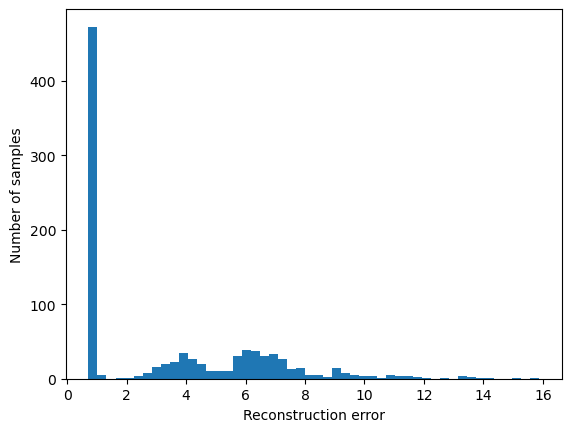

In [46]:
import matplotlib.pyplot as plt

plt.hist(reconstruction_error, bins=50)
plt.xlabel("Reconstruction error")
plt.ylabel("Number of samples")
plt.show()


In [48]:
threshold = np.percentile(reconstruction_error, 90) 


In [49]:
from keras.regularizers import l1

autoencoder = Sequential([
    Dense(128, activation='relu', activity_regularizer=l1(1e-5), input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])


In [50]:
from keras.layers import Dropout

autoencoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])


In [51]:
from sklearn.utils import resample

abnormal_data = df[df['activity'] == 'abnormal']
normal_data = df[df['activity'] == 'normal']

abnormal_upsampled = resample(abnormal_data, replace=True, n_samples=len(normal_data), random_state=42)
balanced_data = pd.concat([normal_data, abnormal_upsampled])
